<a href="https://colab.research.google.com/github/Jonny-T87/ML-Projects/blob/main/SalesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Data Project
 Using Indian sales dataset. The dataset contain almost 10k rows of data with many columns like customer name, costumer id, product customer bought, amount spent, number of orders made and a few more.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


##Loading data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diwali Sales Data.csv', encoding='windows-1252')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


##Cleaning data

In [ ]:
#checking nan
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
#droping columns Status and Unnamed1 due to nan
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
#removing 12 rows w/ nan in column Amount
df.dropna(inplace=True)

In [ ]:
#checking nulls are removed
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

##Data Analysis

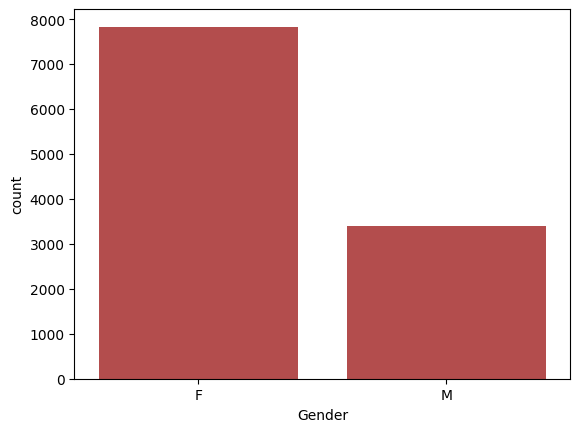

In [ ]:
#ploting count of genders
sns.countplot(x='Gender', data=df, color='r', saturation=0.4)
plt.show()

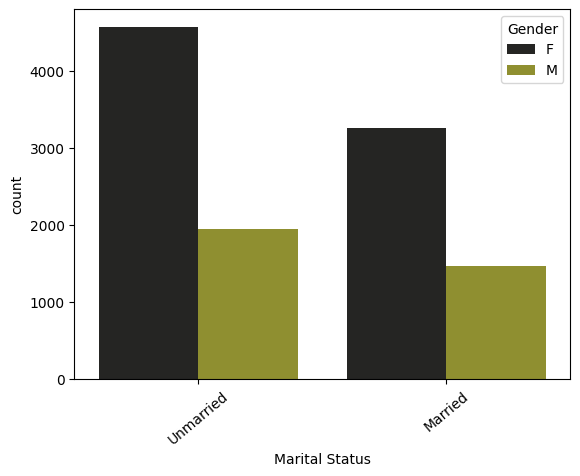

In [ ]:
#plotting Marital Status by Gender
sns.countplot(x='Marital_Status', data=df, hue='Gender', palette='dark:y', saturation=0.5)
plt.xticks(rotation=40, ticks=[0,1], labels=['Unmarried', 'Married'])
plt.xlabel('Marital Status')
plt.show()

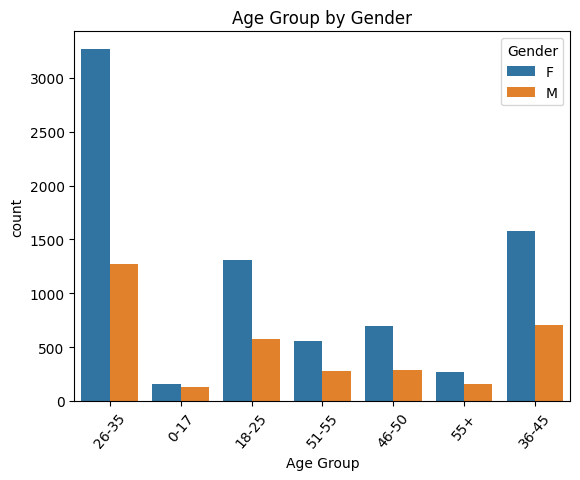

In [ ]:
#plotting age groups by gender
sns.countplot(x='Age Group', data=df, hue='Gender')
plt.xticks(rotation=50)
plt.title('Age Group by Gender')
plt.show()

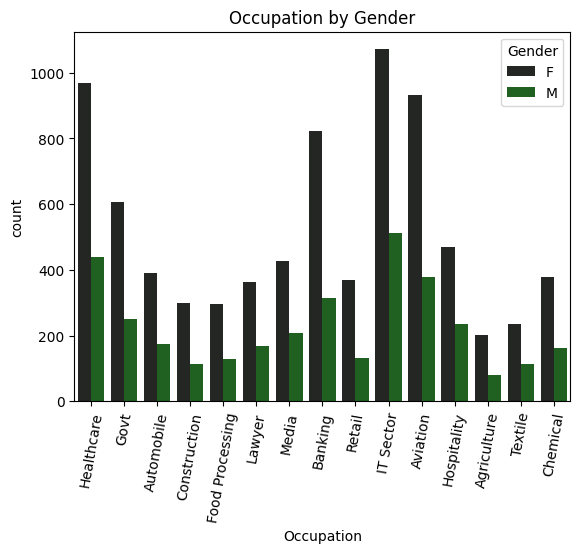

In [ ]:
#plotting occupation by gender
sns.countplot(x='Occupation', data=df, hue='Gender', palette='dark:g', saturation=0.5)
plt.xticks(rotation=80)
plt.title('Occupation by Gender')
plt.show()

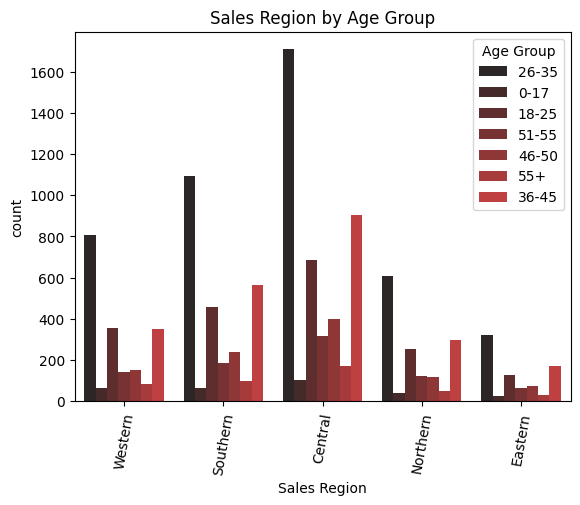

In [ ]:
#plotting Sales Region by Age Group
sns.countplot(x='Zone', data=df, hue='Age Group', palette='dark:r', saturation=0.5)
plt.xticks(rotation=80)
plt.xlabel('Sales Region')
plt.title('Sales Region by Age Group')
plt.show()

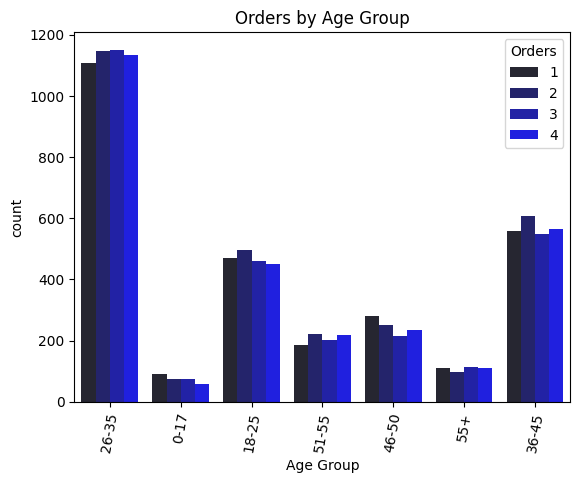

In [ ]:
#plotting Orders by Age Group
sns.countplot(x='Age Group', hue='Orders', data=df, palette='dark:b')
plt.xticks(rotation=80)
plt.title('Orders by Age Group')
plt.show()


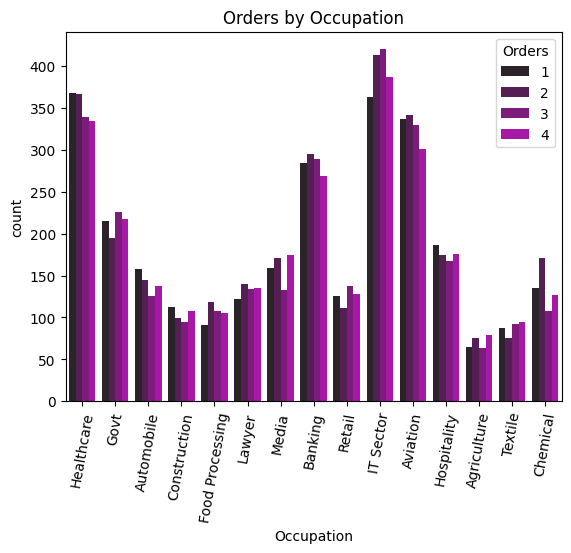

In [ ]:
#plotting orders by occupation
sns.countplot(x='Occupation', hue='Orders', data=df, palette='dark:m')
plt.xticks(rotation=80)
plt.title('Orders by Occupation')
plt.show()

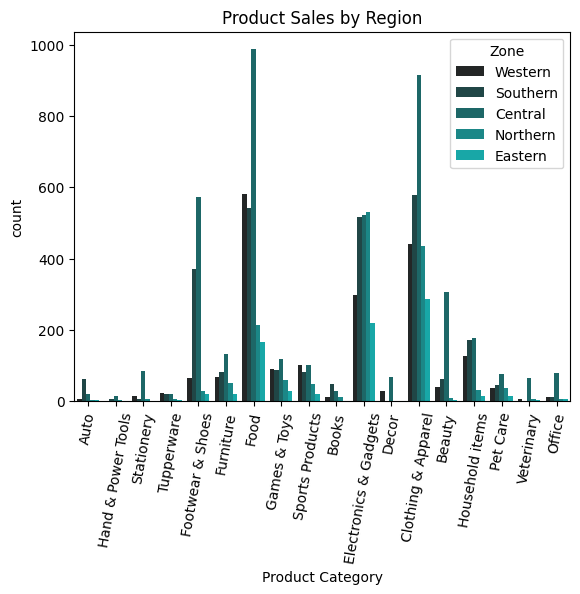

In [ ]:
#plotting product sales by region zones
sns.countplot(x='Product_Category', hue='Zone', data=df, palette='dark:c')
plt.xticks(rotation=80)
plt.title('Product Sales by Region')
plt.xlabel('Product Category')
plt.show()

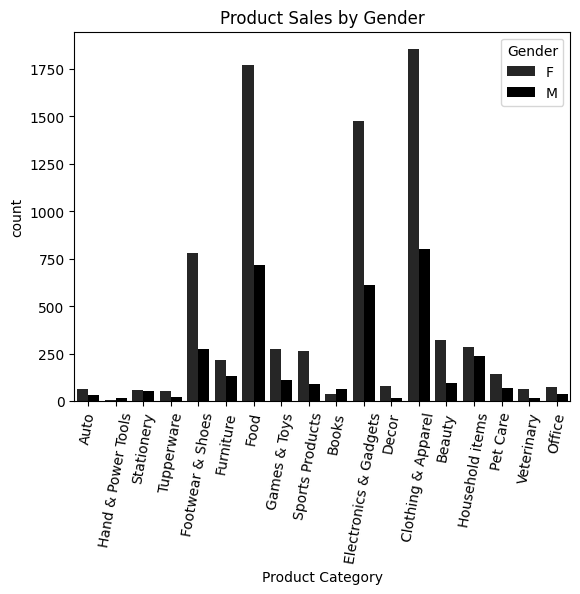

In [ ]:
#plotting Product5 sales by Gender
sns.countplot(x='Product_Category', hue='Gender', data=df, palette='dark:k')
plt.xticks(rotation=80)
plt.title('Product Sales by Gender')
plt.xlabel('Product Category')
plt.show()

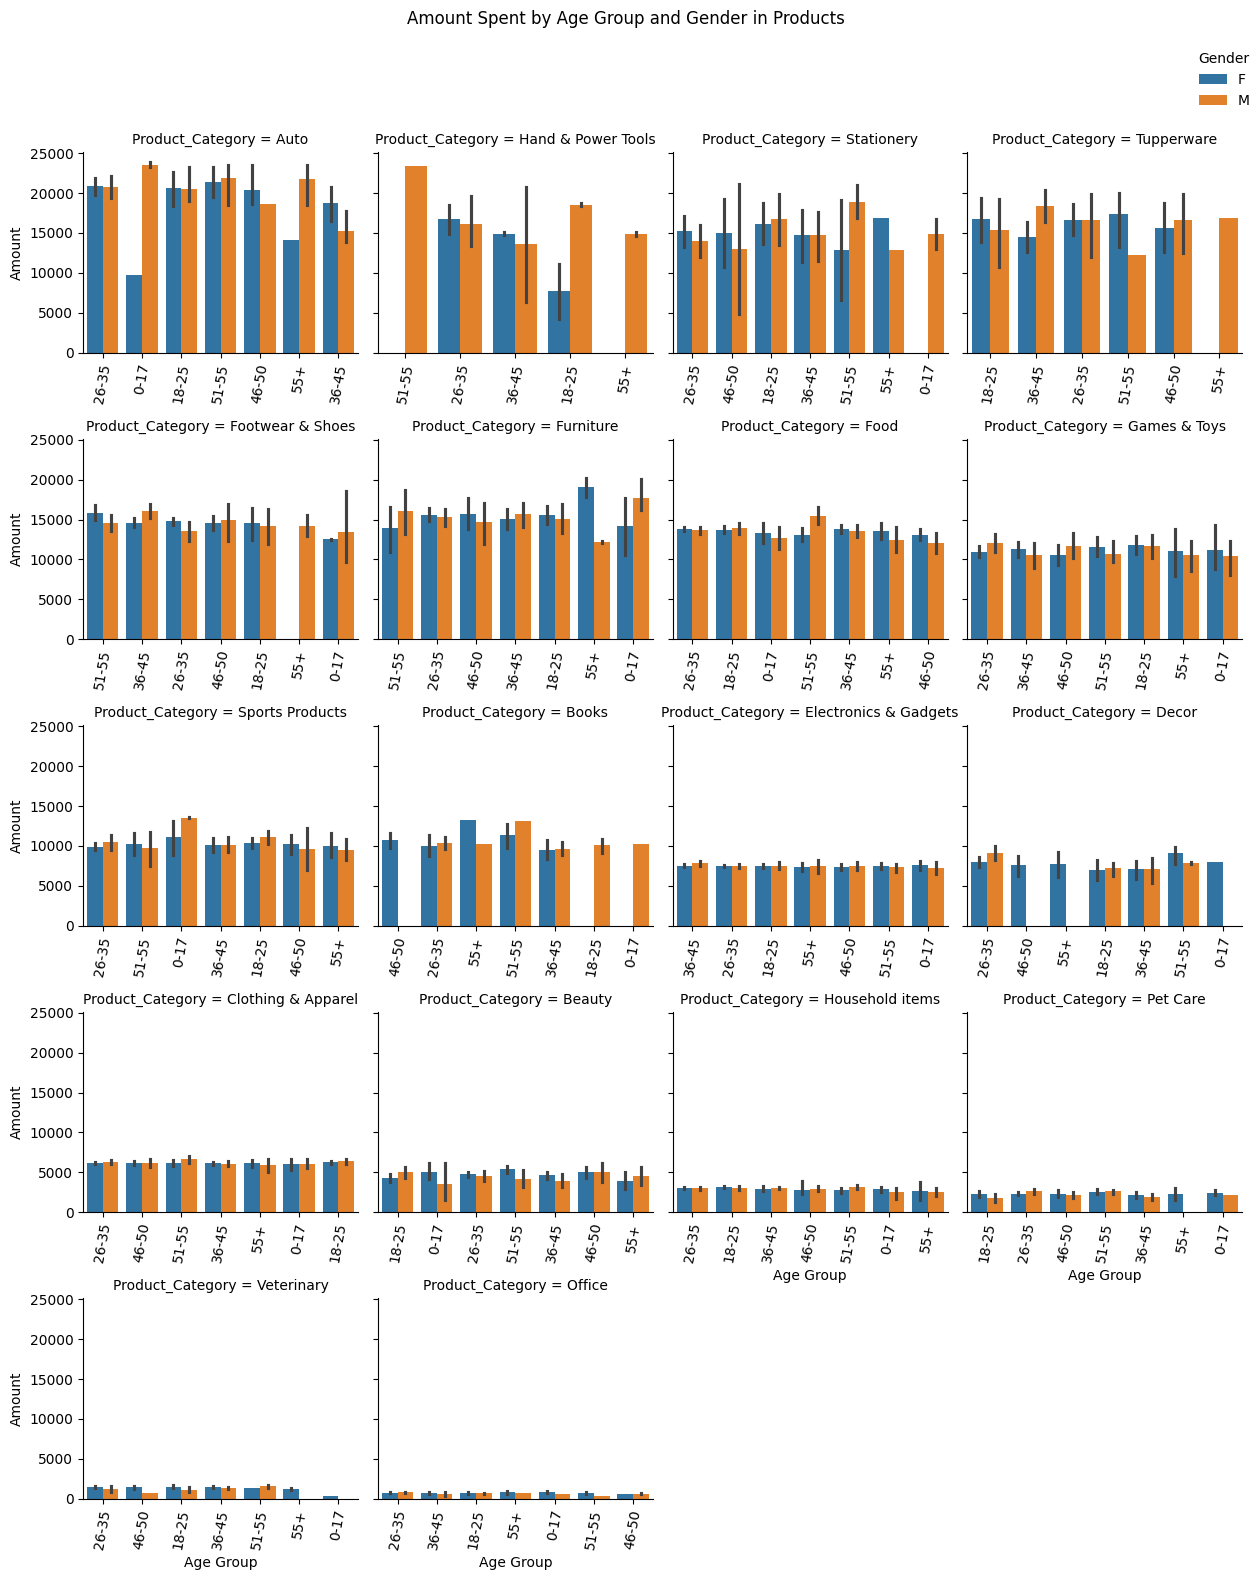

In [ ]:
g = sns.catplot(x='Age Group', y='Amount', hue='Gender', kind='bar', data=df, col='Product_Category', height=3, col_wrap=4, sharex=False)
g.set_axis_labels('Age Group', 'Amount')
g.set_titles(row_template='Product_Category')
g.set_xticklabels(rotation=80)
g.set_ylabels('Amount')
g.set_xlabels('Age Group')
g.fig.suptitle('Amount Spent by Age Group and Gender in Products', y=1.05)
g.legend.set_title('Gender')
g.legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
plt.show()



##Analysis Based on Sales Data

Our customer base is predominantly composed of women, both single and married, falling within the age bracket of 26 to 45 years. These women are primarily employed in sectors such as Information Technology, Aviation, Healthcare, and Banking.

Geographically, our sales are most robust in the Southern and Central regions. On average, these women customers place between 2 to 4 orders. Notably, customers working in the IT sector tend to place more orders than those in other occupations.

The top-selling products in the Central and Southern regions encompass food items, clothing and apparel, and electronic gadgets. It's noteworthy that a significant portion of our sales is driven by women.

A deeper dive into the data reveals interesting spending patterns across different age groups and genders. Women aged 50 and above tend to spend more on books, décor, and furniture. In contrast, younger women, specifically those aged 25 to 35, allocate more of their budget to household essentials like food, Tupperware, and shoes.

Men, particularly those in the 0-17 and 50+ age groups, primarily invest in auto and power tools.

Interestingly, veterinary and pet care products are the least popular among all our customers, suggesting a lower pet ownership rate. This category could potentially be phased out to optimize costs and redirect resources towards higher-performing categories like Tupperware and hand and power tools.